In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [3]:
file_dir = "./data/"

def read_t(t,root="./", str_check=False):
  if not str_check :
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
  else :
    data = pickle.load(open(root+f'Ising2DFM_reSample_L40_T={t}.pkl','rb'))
  return np.unpackbits(data).astype(int).reshape(-1,1600)

In [4]:
data_all = read_t("All", file_dir, True)
data_label = pickle.load(open(file_dir+f'Ising2DFM_reSample_L40_T=All_labels.pkl','rb'))

nom_temp = np.arange(0.25, 4.25, 0.25)

tot_data = np.empty((0,40,40))
tot_label = np.empty(0)

for T in nom_temp :
  tmp = read_t(T, file_dir)
  tot_data = np.concatenate((tot_data, tmp.reshape(tmp.shape[0], 40, 40)))
  tot_label = np.concatenate((tot_label, T*np.ones(tmp.shape[0])))

In [8]:
tot_data.shape

(160000, 40, 40)

In [18]:
anatol_data = np.load("./data_ising.npy")
anatol_temp = np.concatenate([i*np.ones(100) for i in np.linspace(2, 3, 5)])
anatol_data = anatol_data.reshape(500, 40, 40).reshape(500, 1600)

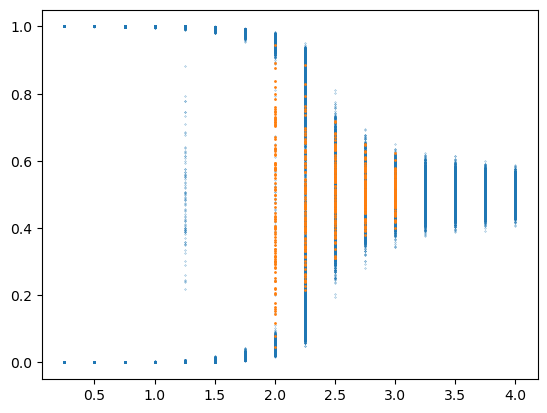

In [24]:
plt.scatter(tot_label, tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=(1)), label="data", s=0.05)
plt.scatter(anatol_temp, anatol_data.mean(axis=(1)), label="anatol", s=1)
